# Matplotlib Tutorial

In [1]:
# Matplotlib is the most popular Python library for producing plots
# We can create visualizations inline in the Jupyter notebook 
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
data = np.arange(10)

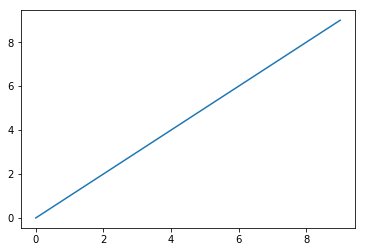

In [3]:
plt.plot(data)

In [4]:
# Plots are reset after each cell is run
# 

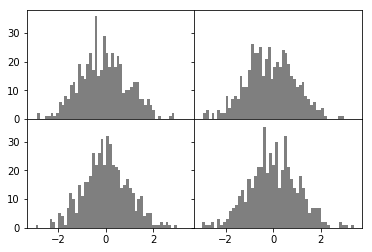

In [5]:
fig, axes = plt.subplots( 2, 2, sharex = True, sharey = True) 
for i in range( 2): 
    for j in range( 2): 
        axes[ i, j].hist( np.random.randn( 500), bins = 50, color ='k', alpha = 0.5) 
        plt.subplots_adjust( wspace = 0, hspace = 0)

#McKinney, Wes (2017-09-25). Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython (Kindle Locations 9143-9153). O'Reilly Media. Kindle Edition. 

## Matplotlib Styles
* Matplotlib includes a number of style sheets to make visualizations look more professional
* Docs: https://matplotlib.org/users/style_sheets.html

In [6]:
# We can list all of the styles available
print(plt.style.available)

['_classic_test', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2']


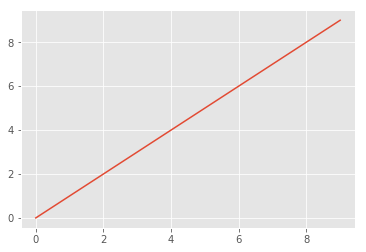

In [7]:
## ggplot is a popular R plotting library
plt.style.use('ggplot')
plt.plot(data)

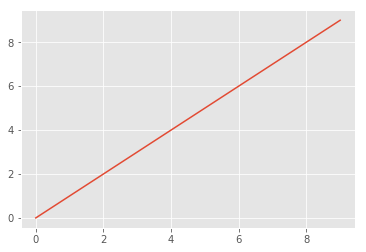

In [8]:
## ggplot is a popular R plotting library
plt.style.use('ggplot')
plt.plot(data)

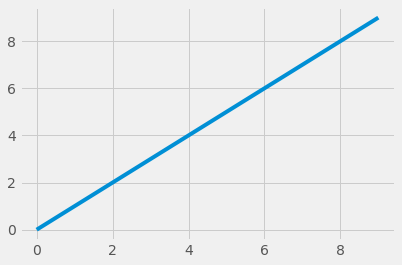

In [9]:
# Fivethirtyeight style sheet plots in the style of popular analytics blog 538
# http://fivethirtyeight.com/
plt.style.use('fivethirtyeight')
plt.plot(data)

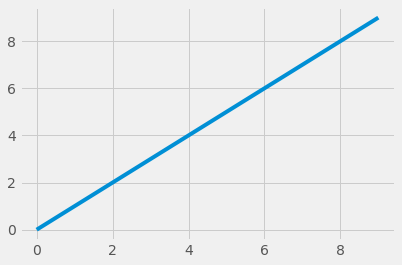

In [10]:
# Popular python plotting library Seaborn also contains a number of style sheets
import seaborn as sns
sns.set_style()
plt.plot(data)

# Plotting from Pandas DataFrames
* We can also use matplotlib commands to plot directly from Pandas DataFrames

In [11]:
import pandas as pd

In [12]:
hr_df = pd.read_csv('hr_since_1985.csv', dtype={'Season': str})
hr_df_subset = hr_df[(hr_df['Name'].isin(['Mark McGwire','Ken Griffey Jr.']))&
     (hr_df['Season'].isin(['1997','1998','1999']))][['Season','Name','HR']].reset_index(drop=True)
hr_df_pivot = pd.pivot_table(hr_df_subset, columns = 'Name', index='Season', values='HR')
hr_df_pivot

Name,Ken Griffey Jr.,Mark McGwire
Season,,
1997,56,58
1998,56,70
1999,48,65


## Line Plot

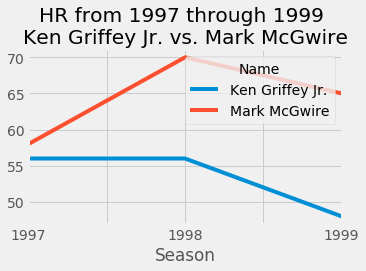

In [13]:
hr_df_pivot.plot(kind='line', title='HR from 1997 through 1999 \nKen Griffey Jr. vs. Mark McGwire', figsize=[5,3])

## Histogram
* We can share an instantiated axis from matplotlib to overlay two histograms over each other 

In [14]:
by_game_rest_score = pd.read_csv('by_game_rest_score.csv')

Text(0.5,1,'Pistons Home and Away Points Distribution')

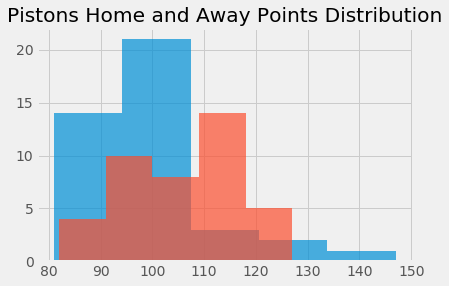

In [15]:
fig, share_ax = plt.subplots()
by_game_rest_score[by_game_rest_score['away_team']=='Detroit Pistons']['away_points'].hist(bins=5, ax=share_ax, alpha=.7) # alpha is a transparency parameter
by_game_rest_score[by_game_rest_score['home_team']=='Detroit Pistons']['home_points'].hist(bins=5, ax=share_ax, alpha=.7)
share_ax.set_title('Pistons Home and Away Points Distribution')

## Bar Chart
* We can also change the y (and x) limits of the axis and ensure that our y labels are only integers

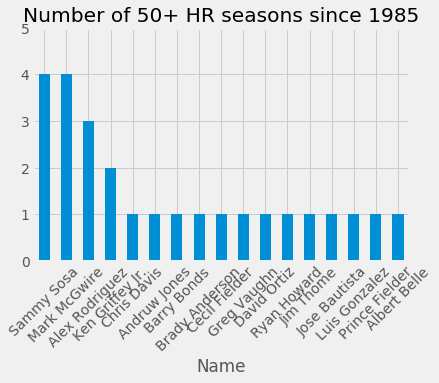

In [16]:
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots()
hr_df[hr_df['HR']>=50].groupby('Name').size().sort_values(ascending=False).plot(kind='Bar', rot=45) # Rot rotates the x axis labels
ax.set_title('Number of 50+ HR seasons since 1985')
ax.set_ylim((0,5))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

## Scatter Plot

In [17]:
# Convert our BB% and SO% to floats
hr_df['BB%'] = hr_df['BB%'].apply(lambda x: float(x[:-1]))
hr_df['K%'] = hr_df['K%'].apply(lambda x: float(x[:-1]))

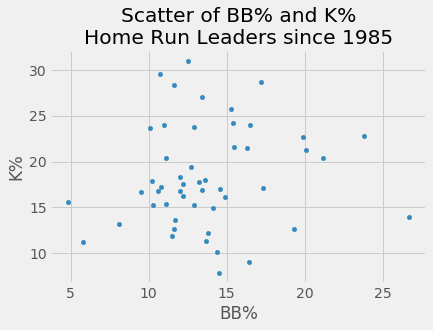

In [18]:
hr_df.plot(kind='scatter', x='BB%', y='K%', title='Scatter of BB% and K%\nHome Run Leaders since 1985')

## Matplotlib Savefig
* We can save our figure to a file if we want using plt.savefig

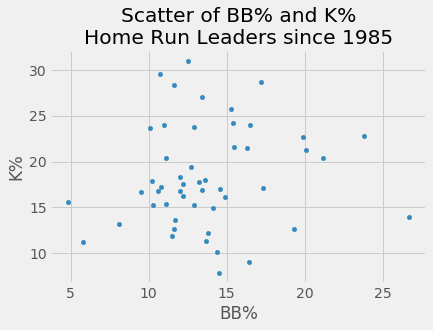

In [19]:
hr_df.plot(kind='scatter', x='BB%', y='K%', title='Scatter of BB% and K%\nHome Run Leaders since 1985')
plt.savefig('hr_bb_scatter.png')